In [2]:
import torch

torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]]).shape

c:\githubrepos\torch\torch\lib\site-packages\torch\_subclasses\functional_tensor.py:258: UserWarning: Failed to initialize NumPy: numpy.core.multiarray failed to import (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


torch.Size([1, 8])

In [11]:
sigmoid=torch.nn.Sigmoid()
sigmoid(torch.tensor([[2, 3, 6, 7, 9, 3, 2, 1]]))

tensor([[0.8808, 0.9526, 0.9975, 0.9991, 0.9999, 0.9526, 0.8808, 0.7311]])

In [12]:
sigmoid=torch.nn.Sigmoid()
sigmoid(torch.tensor([[2]]))

tensor([[0.8808]])

In [15]:
probabilities=torch.nn.Softmax(dim=-1)
probabilities(torch.tensor([[2.0,3.0,6.0,7.0]]))

tensor([[0.0048, 0.0131, 0.2641, 0.7179]])

In [17]:
tensor1=torch.tensor([[0.2]])
tensor1.shape

torch.Size([1, 1])

In [18]:
sigmoid=torch.nn.Sigmoid()
sigmoid(tensor1)

tensor([[0.5498]])

In [21]:
tensor2=torch.tensor([0.2,0.4,6,7])
softmax=torch.nn.Softmax(dim=-1)
softmax(tensor2)

tensor([0.0008, 0.0010, 0.2685, 0.7297])

In [26]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=torch.nn.Linear(in_features=4,out_features=2)

    def forward(self,x):
        return self.linear(x)

model=LinearModel()
model(tensor2)
            

tensor([ 2.2995, -2.3785], grad_fn=<ViewBackward0>)

In [65]:
class BinaryModel(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear=torch.nn.Linear(in_features=input_size, out_features=1)
        self.sigmoid=torch.nn.Sigmoid()

    def forward(self,x):
        return self.sigmoid(self.linear(x))

model=BinaryModel(input_size=4)
tensor4=torch.randn(5,4)

print(tensor4)
print(model(tensor4))

tensor_target=torch.tensor([[0.0],[0.0],[1.0],[0.0],[0.0]])
loss_fn=torch.nn.BCELoss()
print(loss_fn(model(tensor4),tensor_target))

tensor([[ 0.3937,  1.0823,  0.0938,  0.0305],
        [ 1.0205,  2.7530,  1.1021,  0.1152],
        [ 1.1011,  0.3278,  0.4385, -1.5895],
        [-1.2230,  1.3043, -0.3584,  1.1146],
        [ 0.3167,  0.1213,  1.3730, -0.6333]])
tensor([[0.6604],
        [0.8262],
        [0.6935],
        [0.5513],
        [0.6470]], grad_fn=<SigmoidBackward0>)
tensor(1.0077, grad_fn=<BinaryCrossEntropyBackward0>)


In [50]:
tensor3=tensor2.unsqueeze(0)
tensor3

tensor([[0.2000, 0.4000, 6.0000, 7.0000]])

In [ ]:
tensor1=torch.randint(0,10,(5,4))
print(tensor1)

In [73]:
tensor1=torch.randn(5,4)
print(tensor1)
class MultiClassClassifier(torch.nn.Module):
    def __init__(self,input_size,num_classes):
        super().__init__()
        self.linear=torch.nn.Linear(input_size,num_classes)
    def forward(self,x):
        return self.linear(x)
model=MultiClassClassifier(4,3)
logits=model(tensor1)
print(logits)
softmax1=torch.nn.functional.softmax(logits,dim=1)
softmax2=torch.nn.functional.softmax(logits,dim=-1)
print(softmax1)
print(softmax2)
tensor_target1=torch.tensor([1,2,0,1,2])
loss_fn=torch.nn.CrossEntropyLoss()
print(loss_fn(logits,tensor_target1).item())

tensor([[ 1.2467, -0.8164,  0.3122,  1.1547],
        [ 0.9113,  0.5861, -0.5674,  1.3743],
        [-0.4980,  1.1065, -0.8463, -0.7794],
        [ 2.1532,  1.0708,  0.6620,  0.8597],
        [ 0.0769, -0.1425,  0.5847,  0.5027]])
tensor([[-0.8257, -0.4527,  0.4132],
        [-0.6668,  0.5185,  0.3132],
        [-0.4158,  1.0394,  0.4436],
        [-0.7047, -0.0204,  0.6933],
        [-0.0963,  0.2544, -0.0530]], grad_fn=<AddmmBackward0>)
tensor([[0.1694, 0.2460, 0.5847],
        [0.1442, 0.4717, 0.3841],
        [0.1308, 0.5604, 0.3088],
        [0.1423, 0.2820, 0.5757],
        [0.2887, 0.4099, 0.3014]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1694, 0.2460, 0.5847],
        [0.1442, 0.4717, 0.3841],
        [0.1308, 0.5604, 0.3088],
        [0.1423, 0.2820, 0.5757],
        [0.2887, 0.4099, 0.3014]], grad_fn=<SoftmaxBackward0>)
1.3717321157455444


In [96]:
inputs=torch.randn(3,5)
weights=torch.tensor([[5.0,2.9,1.2,2.4,2.9],[1.0,1.2,3.4,5.6,1.9]])
print(weights.shape)
print(inputs)
print(weights.T)
bias=torch.tensor([0.3,-0.2])

targets=torch.matmul(inputs,weights.T)+bias
print(targets)

torch.Size([2, 5])
tensor([[-1.5166, -0.0420, -0.0929,  0.0530,  0.7173],
        [ 0.6436,  1.3117,  0.6031, -0.9562, -2.7012],
        [ 1.4205, -0.7826,  0.3722,  0.4588, -0.4575]])
tensor([[5.0000, 1.0000],
        [2.9000, 1.2000],
        [1.2000, 3.4000],
        [2.4000, 5.6000],
        [2.9000, 1.9000]])
tensor([[-5.3090, -0.4234],
        [-2.0828, -6.4188],
        [ 5.3538,  3.2468]])


In [97]:
model=torch.nn.Linear(5,2)
outputs=model(inputs)
print(outputs)
loss_fn=torch.nn.MSELoss()
loss=loss_fn(outputs,targets)
print(loss.item())
loss.backward()
# Print gradient for the weights of the linear layer
print("Gradients for model parameters:")
for name, param in model.named_parameters():
    print(name, param.grad)

print("Model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param}")

tensor([[ 0.6152, -0.6589],
        [-1.3938,  0.0135],
        [-0.8328,  0.1145]], grad_fn=<AddmmBackward0>)
20.847421646118164
Gradients for model parameters:
weight tensor([[-5.7763,  1.8321, -0.8125, -1.0612,  1.7396],
        [ 0.0158,  3.6328,  0.9117, -2.5333, -5.3703]])
bias tensor([0.1422, 1.0215])
Model parameters:
weight: Parameter containing:
tensor([[-0.3484,  0.2764,  0.2126,  0.3883,  0.4056],
        [ 0.2183,  0.0349, -0.1913,  0.1975, -0.1422]], requires_grad=True)
bias: Parameter containing:
tensor([-0.1933, -0.2527], requires_grad=True)


In [95]:
learning_rate = 0.01
num_epochs = 1000
model=torch.nn.Linear(5,2)
outputs=model(inputs)
print(outputs)
loss_fn=torch.nn.MSELoss()
loss=loss_fn(outputs,targets)
print(loss.item())


for epoch in range(num_epochs):
    outputs=model(inputs)
    loss_fn=torch.nn.MSELoss()
    loss=loss_fn(outputs,targets)
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param-=learning_rate*param.grad
    model.zero_grad()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

print("\nTrained Weights:", model.weight.data)
print("\nTrained Bias:", model.bias.data)

Epoch 0, Loss: 3.384078295365356e-10
Epoch 100, Loss: 2.5409008230781183e-10
Epoch 200, Loss: 2.5409008230781183e-10
Epoch 300, Loss: 2.5409008230781183e-10
Epoch 400, Loss: 2.5409008230781183e-10
Epoch 500, Loss: 2.5409008230781183e-10
Epoch 600, Loss: 2.5409008230781183e-10
Epoch 700, Loss: 2.5409008230781183e-10
Epoch 800, Loss: 2.5409008230781183e-10
Epoch 900, Loss: 2.5409008230781183e-10

Trained Weights: tensor([[ 1.8065,  4.3651,  0.7651,  2.5864,  1.4726],
        [-0.8249,  2.1054,  1.9275,  4.9510,  3.2283]])

Trained Bias: tensor([-1.0421,  0.2041])


In [93]:
print(targets)
print(model(inputs))

tensor([[ 8.2171, 14.4671],
        [-7.1001, -8.8904],
        [ 5.8419, -5.4371]])
tensor([[ 8.2194, 14.4678],
        [-7.0942, -8.8886],
        [ 5.8402, -5.4376]], grad_fn=<AddmmBackward0>)


In [102]:
inputs=torch.randn(10,5)
targets=torch.randn(10,1)
num_epochs=1000
model=torch.nn.Linear(5,1)
optimizer=torch.optim.AdamW(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    outputs=model(inputs)
    loss_fn=torch.nn.MSELoss()
    loss=loss_fn(outputs,targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100==0:
        print(f"Epoch:{epoch} Loss:{loss.item():.4f}")

print(targets)
print(model(inputs))

Epoch:0 Loss:1.8850
Epoch:100 Loss:1.3412
Epoch:200 Loss:0.9683
Epoch:300 Loss:0.7147
Epoch:400 Loss:0.5452
Epoch:500 Loss:0.4335
Epoch:600 Loss:0.3592
Epoch:700 Loss:0.3076
Epoch:800 Loss:0.2699
Epoch:900 Loss:0.2408
tensor([[-0.2049],
        [-0.1036],
        [ 0.2817],
        [-0.0381],
        [-1.1257],
        [ 0.2573],
        [ 0.8190],
        [ 0.2288],
        [-0.3503],
        [-2.2094]])
tensor([[-0.5312],
        [-0.3439],
        [ 0.1631],
        [-0.4970],
        [-0.6852],
        [ 0.2804],
        [ 0.5715],
        [ 0.0797],
        [-0.7242],
        [-1.0389]], grad_fn=<AddmmBackward0>)


In [3]:
inputs=torch.randn(10,5)
targets=torch.randn(10,1)
num_epochs=1000
model=torch.nn.Linear(5,1)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

for epoch in range(num_epochs):
    outputs=model(inputs)
    loss_fn=torch.nn.MSELoss()
    loss=loss_fn(outputs,targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100==0:
        print(f"Epoch:{epoch} Loss:{loss.item():.4f}")

print(targets)
print(model(inputs))

Epoch:0 Loss:1.3267
Epoch:100 Loss:0.1958
Epoch:200 Loss:0.1766
Epoch:300 Loss:0.1658
Epoch:400 Loss:0.1581
Epoch:500 Loss:0.1524
Epoch:600 Loss:0.1482
Epoch:700 Loss:0.1452
Epoch:800 Loss:0.1429
Epoch:900 Loss:0.1412
tensor([[-0.1197],
        [ 0.0948],
        [ 1.0831],
        [-0.3146],
        [ 0.7273],
        [-0.2217],
        [ 1.0021],
        [-0.0319],
        [ 0.2326],
        [ 1.0573]])
tensor([[ 0.0189],
        [ 0.5252],
        [ 0.6595],
        [-0.4450],
        [ 0.3261],
        [ 0.1696],
        [ 0.4415],
        [ 0.3943],
        [ 0.6054],
        [ 0.8347]], grad_fn=<AddmmBackward0>)


In [9]:
inputs=torch.randn(10,5)
targets=torch.randn(10,1)
model=torch.nn.Sequential(torch.nn.Linear(5,4), torch.nn.ReLU(), torch.nn.Linear(4,1))
optimizer=torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
n_epoch=1000
for i in range(n_epoch):
    outputs=model(inputs)
    loss_fn=torch.nn.MSELoss()
    loss=loss_fn(outputs,targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print(f"Epoch : {epoch}, Loss: {loss.item():.4f}")
print(targets)
print(model(inputs))

Epoch : 999, Loss: 1.4770
Epoch : 999, Loss: 0.0909
Epoch : 999, Loss: 0.0118
Epoch : 999, Loss: 0.0012
Epoch : 999, Loss: 0.0001
Epoch : 999, Loss: 0.0000
Epoch : 999, Loss: 0.0000
Epoch : 999, Loss: 0.0000
Epoch : 999, Loss: 0.0000
Epoch : 999, Loss: 0.0000
tensor([[-1.0090],
        [-1.6827],
        [-0.4960],
        [-1.1584],
        [-1.5429],
        [ 1.3114],
        [ 0.8068],
        [-0.5395],
        [ 2.0262],
        [ 1.0999]])
tensor([[-1.0090],
        [-1.6827],
        [-0.4960],
        [-1.1584],
        [-1.5429],
        [ 1.3114],
        [ 0.8068],
        [-0.5395],
        [ 2.0262],
        [ 1.0999]], grad_fn=<AddmmBackward0>)


In [10]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {num_params}")

Total trainable parameters: 29


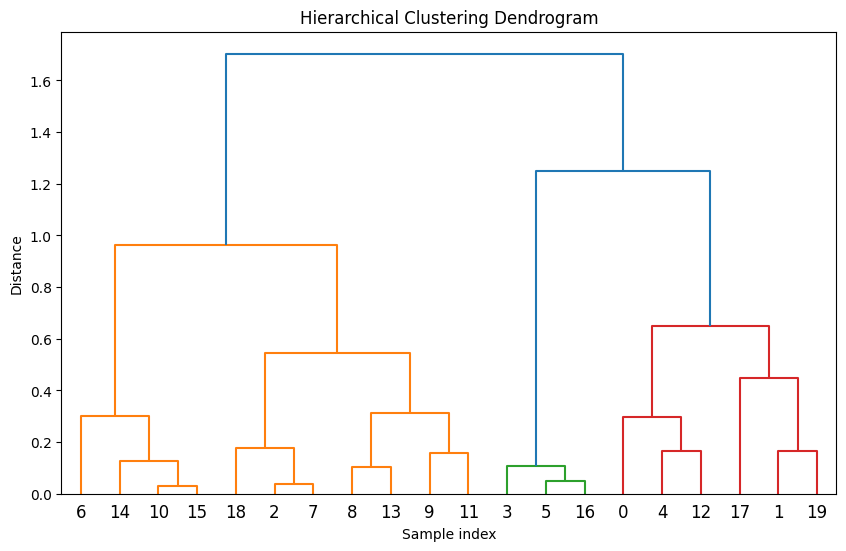

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate some random 2D data for demonstration
np.random.seed(42)
data = np.random.rand(20, 2)  # 20 samples, 2 features

# Perform hierarchical clustering using 'ward' linkage
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

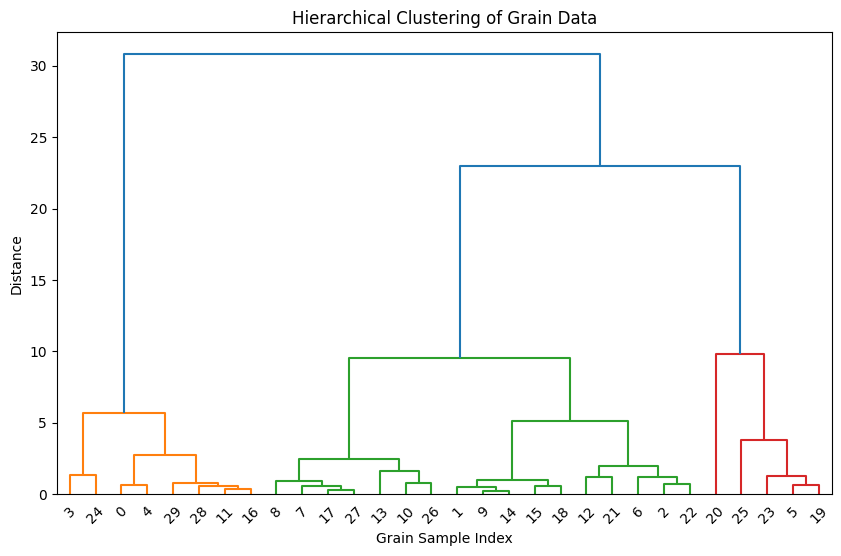

In [3]:
import pandas as pd

# Suppose we have a grain dataset (for illustration, we simulate some data)
np.random.seed(0)
grain_data = pd.DataFrame({
    'Weight': np.random.normal(50, 5, 30),
    'Length': np.random.normal(5, 0.5, 30),
    'Width': np.random.normal(3, 0.3, 30)
})

# Perform hierarchical clustering
Z_grain = linkage(grain_data.values, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z_grain, labels=grain_data.index.tolist())
plt.title("Hierarchical Clustering of Grain Data")
plt.xlabel("Grain Sample Index")
plt.ylabel("Distance")
plt.show()